In [2]:
import time
start_time=time.time()

In [3]:
from astropy.table import Table
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#matplotlib inline
sns.set_color_codes()
#from sabreMod import sosf,sosfh
from scipy import interpolate

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"

In [4]:
nom_reg='Lag'

In [5]:
damiani_tab1_file = "Obs/J_A+A_604_A135_table2.dat.fits"
tab = Table.read(damiani_tab1_file)
tab
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,RVHalpha,sigHalpha,NormHalpha,RV[NII]6584,sig[NII]6584,Norm[NII]6584,RV[SII]6717,sig[SII]6717,Norm[SII]6717,RV[SII]6731,sig[SII]6731,Norm[SII]6731
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,271.110700,-24.332642,-6.258445,13.711606,56980.737850,-3.934894,11.655811,10499.992090,-3.204393,11.567137,2044.263891,-2.989252,11.512982,1639.080833
std,0.164268,0.105422,2.742485,1.677870,56029.717118,3.240030,1.140301,10622.170782,3.345863,1.205795,1687.371379,3.328345,1.229661,1718.881796
min,270.544500,-24.566860,-13.550000,11.890000,1612.260000,-11.440000,3.990000,651.350000,-12.450000,3.590000,217.730000,-12.480000,8.960000,163.940000
25%,271.010500,-24.406500,-8.460000,13.160000,24079.470000,-5.950000,10.870000,5686.930000,-5.440000,10.730000,1197.130000,-5.260000,10.620000,889.610000
50%,271.110600,-24.344670,-6.370000,13.550000,41640.680000,-3.950000,11.530000,8211.000000,-3.190000,11.450000,1622.020000,-2.980000,11.380000,1223.920000
75%,271.211600,-24.256500,-4.450000,14.030000,69764.840000,-1.900000,12.310000,11584.220000,-1.180000,12.250000,2273.270000,-0.960000,12.230000,1750.890000
max,271.606600,-24.054330,2.840000,64.590000,589418.530000,8.010000,18.520000,125752.930000,10.100000,17.240000,17676.600000,10.120000,17.550000,20417.110000


In [6]:
m=df['sigHalpha'] < df['sigHalpha'].mean()+4*df['sigHalpha'].std()

In [7]:
df=df[m]

<ipython-input-8-15740d443dac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pairplot(df[m],


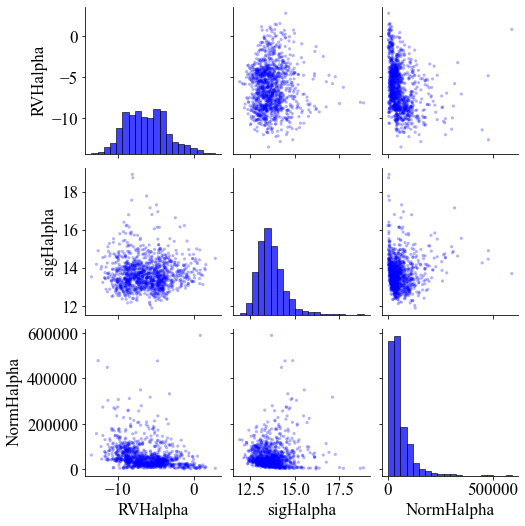

In [8]:
sns.pairplot(df[m],
             vars=["RVHalpha", "sigHalpha", "NormHalpha"],
             diag_kind='hist',
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none', color="blue"),
             diag_kws=dict(bins=20, color="blue"),
            )

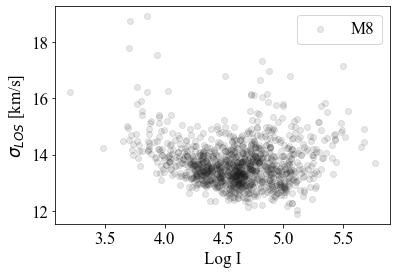

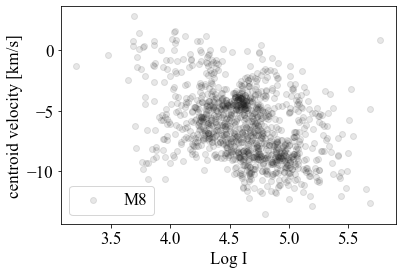

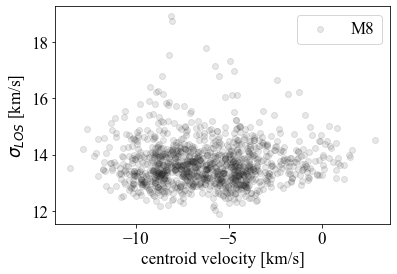

In [9]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.NormHalpha),df.sigHalpha, alpha=0.1, color='k', label='M8')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.NormHalpha),df.RVHalpha, alpha=0.1, color='k', label='M8')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.RVHalpha,df.sigHalpha, alpha=0.1, color='k', label='M8')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

Structure Function

In [10]:
df.describe()

,RAdeg,DEdeg,RVHalpha,sigHalpha,NormHalpha,RV[NII]6584,sig[NII]6584,Norm[NII]6584,RV[SII]6717,sig[SII]6717,Norm[SII]6717,RV[SII]6731,sig[SII]6731,Norm[SII]6731
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,271.110701,-24.332602,-6.257440,13.668342,56579.890731,-3.929209,11.662330,10508.154413,-3.199966,11.565697,2044.058087,-2.985740,11.510332,1638.544439
std,0.164338,0.105458,2.743435,0.782749,54338.950357,3.235531,1.118632,10622.996539,3.343837,1.205296,1688.074478,3.327578,1.226816,1719.514527
min,270.544500,-24.566860,-13.550000,11.890000,1612.260000,-11.440000,8.600000,651.350000,-12.450000,3.590000,217.730000,-12.480000,8.960000,163.940000
25%,271.010475,-24.406590,-8.462500,13.160000,24060.892500,-5.942500,10.870000,5690.635000,-5.432500,10.727500,1197.040000,-5.252500,10.620000,888.072500
50%,271.110750,-24.344500,-6.365000,13.545000,41627.050000,-3.945000,11.530000,8217.420000,-3.185000,11.445000,1621.685000,-2.980000,11.375000,1222.295000
75%,271.211650,-24.256500,-4.450000,14.030000,69520.437500,-1.900000,12.310000,11584.360000,-1.177500,12.250000,2272.107500,-0.957500,12.222500,1747.320000
max,271.606600,-24.054330,2.840000,18.910000,589418.530000,8.010000,18.520000,125752.930000,10.100000,17.240000,17676.600000,10.120000,17.550000,20417.110000


In [11]:
df2 = df[['RAdeg', 'DEdeg', 'RVHalpha']].copy()
df2.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'RVHalpha' : 'RV'}, inplace = True)
df2.describe()

,X,Y,RV
count,1176.000000,1176.000000,1176.000000
mean,271.110701,-24.332602,-6.257440
std,0.164338,0.105458,2.743435
min,270.544500,-24.566860,-13.550000
25%,271.010475,-24.406590,-8.462500
50%,271.110750,-24.344500,-6.365000
75%,271.211650,-24.256500,-4.450000
max,271.606600,-24.054330,2.840000


In [12]:
data=df2

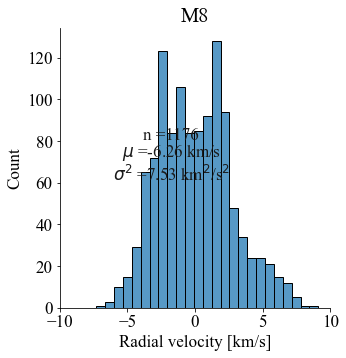

In [13]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-10,10)


plt.text(0.35, 0.86,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.35, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.35, 0.68,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('M8')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')
plt.savefig('Hist//M8.pdf', bbox_inches='tight')

In [14]:
df3=df2

In [14]:


df1 = pd.DataFrame(
    {'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1}
)


df1.describe()

,RA,DE,V,_key
count,1176.000000,1176.000000,1176.000000,1176.0
mean,271.110701,-24.332602,-6.257440,1.0
std,0.164338,0.105458,2.743435,0.0
min,270.544500,-24.566860,-13.550000,1.0
25%,271.010475,-24.406590,-8.462500,1.0
50%,271.110750,-24.344500,-6.365000,1.0
75%,271.211650,-24.256500,-4.450000,1.0
max,271.606600,-24.054330,2.840000,1.0


In [16]:
df2 = df1.copy()

In [35]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA        DE     V       RA_       DE_    V_
0 0  271.0562 -24.10769 -4.44  271.0562 -24.10769 -4.44
  1  271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67
  2  271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41
  3  271.0562 -24.10769 -4.44  271.1592 -24.23067 -7.78
  4  271.0562 -24.10769 -4.44  271.1480 -24.11269 -5.75

In [36]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
pairs = pairs[(pairs.dDE > 0.0)] # & (pairs.dRA > 0.0)]

In [38]:
pairs.head()

RA        DE     V       RA_       DE_    V_      dDE         dRA  \
0 1  271.0562 -24.10769 -4.44  271.0348 -24.18544 -8.67  279.900   70.299156   
  2  271.0562 -24.10769 -4.44  271.0433 -24.22119 -2.41  408.600   42.370665   
  3  271.0562 -24.10769 -4.44  271.1592 -24.23067 -7.78  442.728 -338.295852   
  4  271.0562 -24.10769 -4.44  271.1480 -24.11269 -5.75   18.000 -301.649434   
  5  271.0562 -24.10769 -4.44  271.1266 -24.19394 -7.91  310.500 -231.256821   

              s     log_s    dV      dV2   log_dV2  VV_mean  
0 1  288.593107  2.460286  4.23  17.8929  1.252681   -6.555  
  2  410.790985  2.613621 -2.03   4.1209  0.614992   -3.425  
  3  557.182345  2.745997  3.34  11.1556  1.047493   -6.110  
  4  302.186004  2.480274  1.31   1.7161  0.234543   -5.095  
  5  387.156257  2.587886  3.47  12.0409  1.080659   -6.175

In [39]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,690766.000000,690766.000000,690766.000000,690766.000000,690766.000000,690766.000000,690766.000000,690766.000000,690766.000000,690766.000000,690766.000000,690766.000000,6.907660e+05,690766.000000
mean,271.111208,-24.272499,-6.147761,271.110196,-24.392712,-6.366824,432.766669,3.315048,810.818360,2.826615,0.219063,15.054983,-inf,-6.257293
std,0.179871,0.090353,2.691771,0.147026,0.082680,2.787579,317.865031,762.511806,460.796396,0.294470,3.873889,20.703112,NaN,1.938134
min,270.544500,-24.565560,-13.550000,270.544500,-24.566860,-13.550000,0.072000,-3486.289521,0.791245,-0.101689,-14.990000,0.000000,-inf,-13.215000
25%,271.005300,-24.344330,-8.140000,271.015000,-24.445640,-8.630000,172.908000,-475.706240,469.555201,2.671687,-2.500000,1.512900,1.798102e-01,-7.630000
50%,271.115100,-24.274030,-6.460000,271.108400,-24.392640,-6.310000,371.988000,20.004376,741.449638,2.870082,0.180000,7.075600,8.497633e-01,-6.350000
75%,271.224200,-24.198170,-4.490000,271.195600,-24.344670,-4.430000,633.996000,500.464069,1070.812078,3.029713,2.820000,20.160100,1.304493e+00,-4.955000
max,271.606600,-24.054330,2.840000,271.606600,-24.061310,2.840000,1845.108000,3454.002676,3486.292858,3.542364,16.390000,268.632100,2.429158e+00,2.215000


In [40]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,0.001624,0.500984,-0.000962,-0.000548,-0.000380,0.002175,0.774519,-0.061986,-0.025363,0.348382,0.143450,0.084134,0.347622
DE,0.001624,1.000000,0.115517,0.005130,0.482138,0.010088,0.571826,-0.001974,0.406688,0.402967,0.073007,-0.012768,-0.003259,0.087472
V,0.500984,0.115517,1.000000,-0.000309,0.047523,0.000614,0.073708,0.387923,0.156032,0.146017,0.694408,0.225834,0.131772,0.694865
RA_,-0.000962,0.005130,-0.000309,1.000000,0.021415,0.464531,-0.014803,-0.633295,-0.019086,-0.006915,-0.334482,0.064445,0.042834,0.333848
DE_,-0.000548,0.482138,0.047523,0.021415,1.000000,0.013927,-0.443027,-0.013950,-0.106387,-0.138856,0.023000,-0.024198,-0.029632,0.043016
V_,-0.000380,0.010088,0.000614,0.464531,0.013927,1.000000,-0.002718,-0.294104,0.123967,0.109841,-0.719155,0.021461,0.040528,0.719567
dDE,0.002175,0.571826,0.073708,-0.014803,-0.443027,-0.002718,1.000000,0.011042,0.515785,0.542381,0.053171,0.009594,0.024414,0.049230
dRA,0.774519,-0.001974,0.387923,-0.633295,-0.013950,-0.294104,0.011042,1.000000,-0.035910,-0.015263,0.481180,0.070279,0.038044,0.057881
s,-0.061986,0.406688,0.156032,-0.019086,-0.106387,0.123967,0.515785,-0.035910,1.000000,0.904457,0.019214,0.251753,0.167479,0.197502
log_s,-0.025363,0.402967,0.146017,-0.006915,-0.138856,0.109841,0.542381,-0.015263,0.904457,1.000000,0.022420,0.213646,0.175900,0.180389


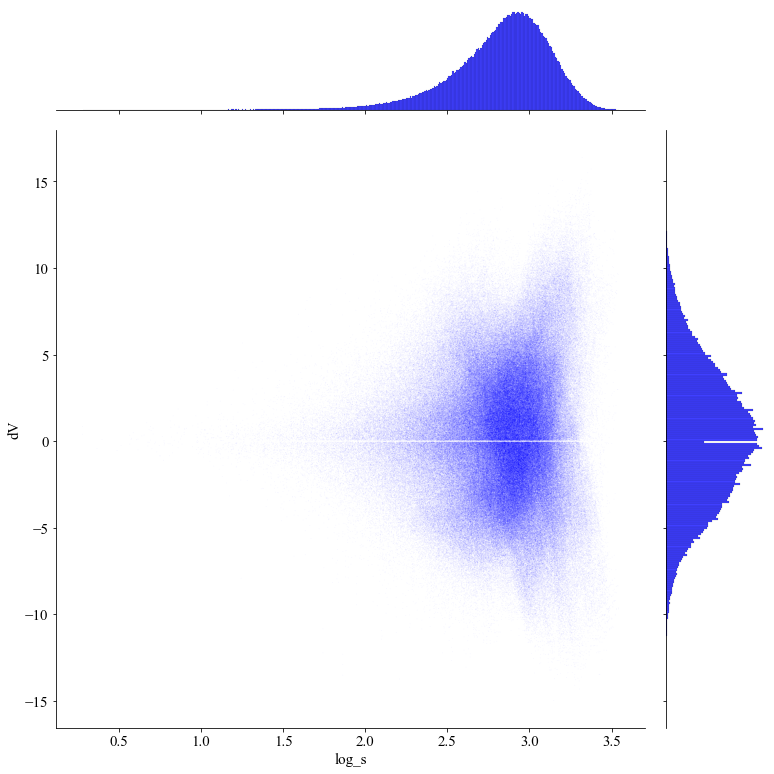

In [41]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.03, s=1, edgecolor='none',color="blue")

ax.fig.set_size_inches(12, 12)

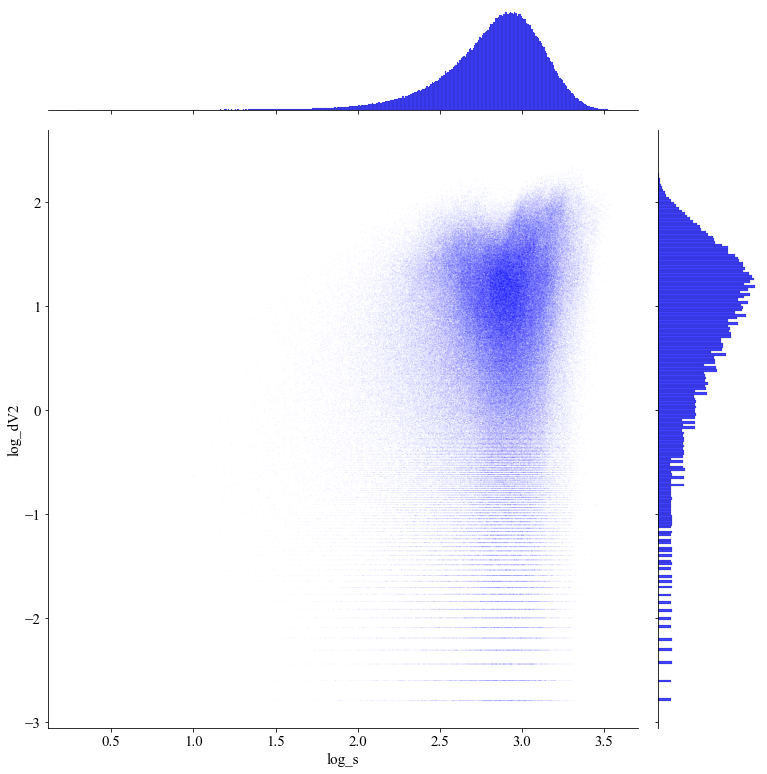

In [42]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.03, s=1, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

In [43]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [44]:
pairs.s_class[pairs.s_class == 0] = 1

In [45]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  32.000000  32.000000
mean    0.209328   0.585685
std     0.261272   0.177326
min     0.003600  -0.101689
25%     0.020475   0.566719
50%     0.119050   0.646686
75%     0.260400   0.694367
max     1.123600   0.746366

s_class = 2
              dV2       log_s
count  283.000000  283.000000
mean     0.966468    1.097949
std      4.086385    0.126214
min      0.000000    0.750564
25%      0.046250    1.025487
50%      0.230400    1.129688
75%      0.656100    1.196809
max     62.726400    1.249197

s_class = 3
               dV2        log_s
count  2901.000000  2901.000000
mean      2.224932     1.590718
std       5.788821     0.124881
min       0.000000     1.251197
25%       0.115600     1.509203
50%       0.592900     1.622408
75%       2.160900     1.693457
max     

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


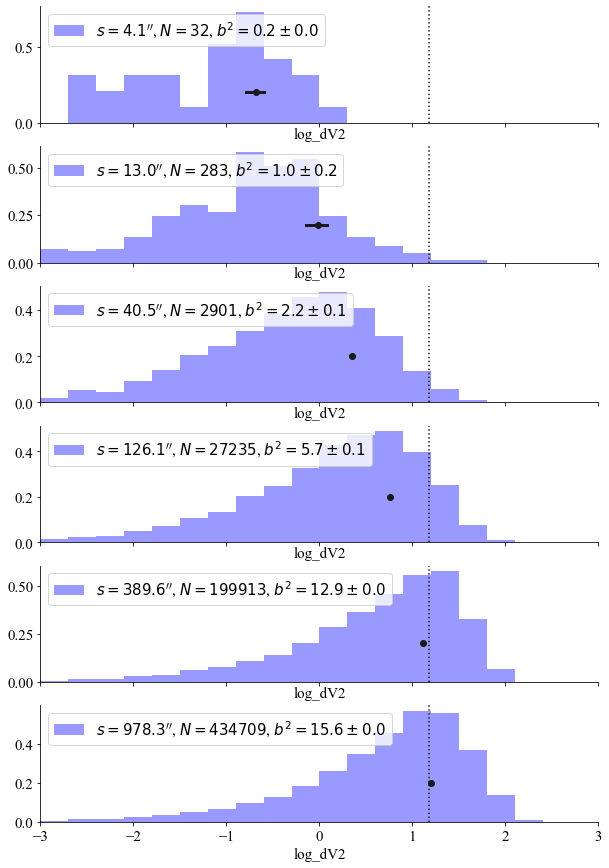

In [46]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20,color="blue", hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [47]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 15.04


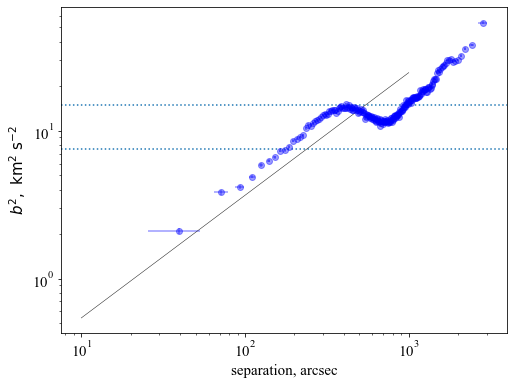

In [48]:
ngroup = 3500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
sgrid = np.logspace(1.0, 3.0)
ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

Repeat previous plot, but with uniform logarithmic spacing in `s`.  We use a log spacing of 0.15 as in the grid-based case. 

In [49]:
d_log_s = 0.15
#log_s_min = np.min(pairs["log_s"])
log_s_min = 1.0
ils = ((pairs["log_s"] - log_s_min) / d_log_s).astype(int).rename("ils")
ils[ils < 0] = 0
ils

0     1        9
      2       10
      3       11
      4        9
      5       10
              ..
1176  1168    11
      1169    11
      1170    11
      1171    11
      1172     9
Name: ils, Length: 690766, dtype: int64

No we have a vector `ils`, which is the index into the log s grid of each separation. We can use this in `groupby`, but we must *not* sort the pairs:

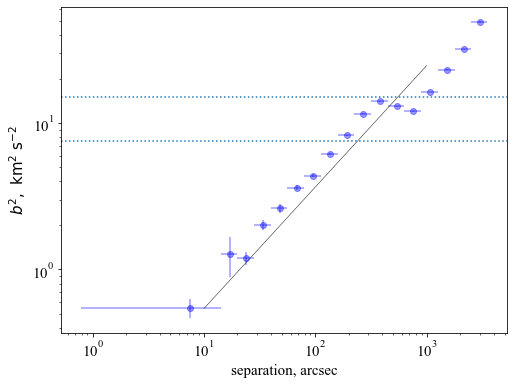

In [50]:
table = pairs[['s', 'dV2']].groupby(ils).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")
sgrid = np.logspace(1.0, 3.0)
ax.plot(sgrid, 0.08*sgrid**(0.83), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [51]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       186.0     9.430503    3.292781     0.791245     6.706083    10.214148   
1       194.0    16.911893    1.594958    14.194495    15.596838    16.879467   
2       388.0    24.185108    2.276084    19.974009    22.446426    24.204394   
3       809.0    34.198565    3.343270    28.198337    31.386199    34.491157   
4      1639.0    48.309515    4.824273    39.843353    43.982070    48.305534   
5      3233.0    68.609239    6.718756    56.247980    62.943038    68.928580   
6      6242.0    96.730844    9.377324    79.438952    88.891975    97.162923   
7     11846.0   136.327172   13.231895   112.210819   125.031164   136.854616   
8     21999.0   192.663841   18.913601   158.493231   176.525358   193.530556   
9     40548.0   271.790451   26.584438   223.875011   249.136848   272.960700   
10    71980.0   383.563083   37.609182   316.228045   351.055530   384.753960   
11   115071.0   540.031846   53.053708   446.686592   494.073137   540.732490   
12   158867.0   756.763867   74.551257   630.958333   692.180027   754.443632   
13   148578.0  1054.672842  104.428364   891.252505   963.683792  1044.876841   
14    83493.0  1463.793030  143.371391  1258.931196  1340.043478  1439.332900   
15    23685.0  2021.764433  187.410064  1778.279491  1864.775181  1978.603789   
16     2008.0  2732.149358  190.342629  2511.934924  2585.732612  2685.650704   

                                    dV2                                \
             75%          max     count       mean        std     min   
ils                                                                     
0      12.341369    14.109871     186.0   0.545494   1.075066  0.0000   
1      18.263306    19.944610     194.0   1.277148   5.343529  0.0000   
2      25.961685    28.179083     388.0   1.196893   2.535805  0.0000   
3      36.932473    39.806962     809.0   2.013692   4.273382  0.0000   
4      52.683810    56.231027    1639.0   2.618692   6.905156  0.0000   
5      74.567589    79.431521    3233.0   3.627896   8.345997  0.0000   
6     105.017197   112.201163    6242.0   4.363997   7.301767  0.0000   
7     147.809374   158.486994   11846.0   6.127321   9.863750  0.0000   
8     209.252237   223.869677   21999.0   8.227001  11.700158  0.0000   
9     294.700145   316.220329   40548.0  11.611698  15.602378  0.0000   
10    416.490000   446.680340   71980.0  14.069574  17.718015  0.0000   
11    585.981108   630.954522  115071.0  13.006217  16.721852  0.0000   
12    820.275686   891.250833  158867.0  12.006459  14.884376  0.0000   
13   1140.399980  1258.912415  148578.0  16.277959  21.494931  0.0000   
14   1572.409049  1778.277743   83493.0  23.207819  28.928178  0.0000   
15   2148.134997  2511.856992   23685.0  32.025263  35.377643  0.0000   
16   2822.325706  3486.292858    2008.0  48.711793  33.331994  0.0004   

                                               
           25%       50%        75%       max  
ils                                            
0     0.036100   0.18490   0.543925    9.3025  
1     0.063775   0.23525   0.718275   62.7264  
2     0.067600   0.30250   1.066075   21.2521  
3     0.090000   0.53290   1.768900   53.7289  
4     0.168100   0.81000   2.576050  149.5729  
5     0.230400   1.06090   3.841600  182.7904  
6     0.324900   1.58760   5.290000  116.4241  
7     0.476100   2.31040   7.452900  130.8736  
8     0.688900   3.31240  11.289600  188.7876  
9     1.000000   5.01760  16.974400  149.5729  
10    1.488400   7.12890  20.520900  172.6596  
11    1.562500   6.91690  18.062500  207.6481  
12    1.512900   6.50250  17.056900  196.8409  
13    1.716100   7.67290  22.184100  205.0624  
14    2.592100  11.69640  32.604100  229.2196  
15    5.152900  19.27210  47.472100  268.6321  
16   20.793600  47

In [52]:
table=[s*0.0063,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//Lagoon2.csv',mode = 'w', index=False)

In [53]:
types = ['HD 164536', '7 Sgr', 'Herschel 36', '9 Sgr', 'HD 164816', 'HD 164865', 'M8E-IR', 'HD 165052','HD 165246']
x_coords = [270.6609, 270.7129, 270.9180, 270.9685, 270.9869, 271.0634, 271.2244, 271.2940,271.5195]
y_coords = [-24.2554, -24.2825, -24.3785, -24.3607, -24.3126, -24.1834, -24.4448, -24.3986,-24.1955]

In [54]:
points_of_interest = {
    "HD 164536": [270.6609, -24.2554],
    "7 Sgr": [270.7129, -24.2825],
    "Herschel 36": [270.9180, -24.3785],
    "9 Sgr": [270.9685, -24.3607],
    "HD 164816": [270.9869, -24.3126],
    "HD 164865": [271.0634, -24.1834],
    "M8E-IR": [271.2244, -24.4448],
    "HD 165052": [271.2940, -24.3986],
    "HD 165246": [271.5195, -24.1955],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

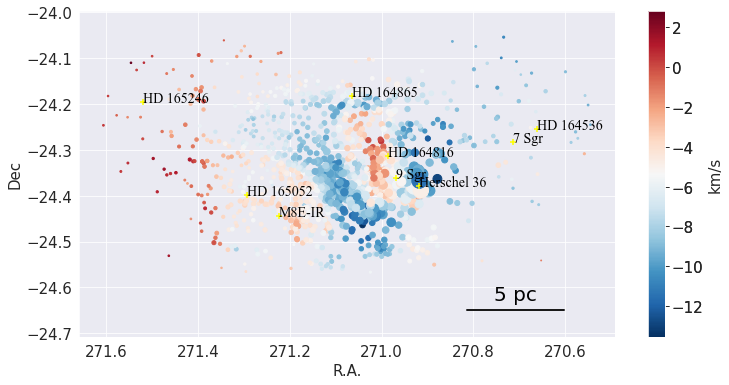

In [56]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 6))
    scat = ax.scatter(df.RAdeg, df.DEdeg, 
                      s=0.0005*((df.NormHalpha)), 
                      c=df.RVHalpha, cmap='RdBu_r',
                     )
    fig.colorbar(scat, ax=[ax])
    #mark_points(ax)
    #ax.set_facecolor('k')
    #ax.axis('equal')
    ax.set_aspect('equal', 'datalim')
    fig.colorbar(scat, ax=ax).set_label("km/s")

    ax.invert_xaxis()

    ax.text(0.855, 0.1, '5 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
    plt.axhline(y=-24.65, xmin=0.725, xmax=0.905, linewidth=2, color = 'k')

    ax.set(xlabel='R.A.', ylabel='Dec')

    
for i, type_ in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='+', color='yellow')
    plt.text(x, y, type_, fontsize=14)

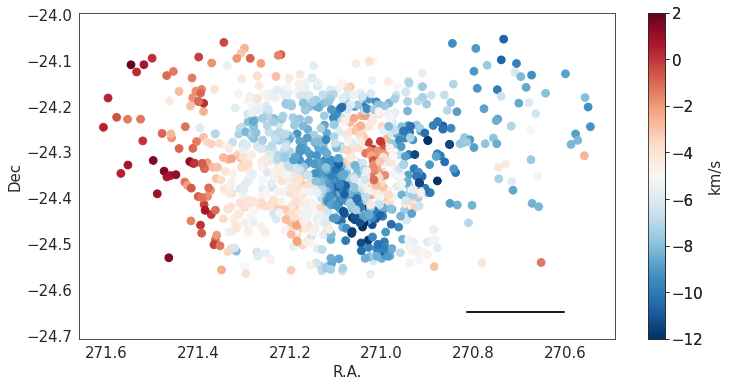

In [61]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12, 6))
    scat = ax.scatter(df.RAdeg, df.DEdeg, 
                      s=60, 
                      c=df.RVHalpha, cmap='RdBu_r',
                      vmin=-12, vmax=2,
                     )
    fig.colorbar(scat, ax=[ax])
    #mark_points(ax)
    #ax.set_facecolor('k')
    #ax.axis('equal')
    ax.set_aspect('equal', 'datalim')
    fig.colorbar(scat, ax=ax).set_label("km/s")

    ax.invert_xaxis()
   
    plt.axhline(y=-24.65, xmin=0.725, xmax=0.905, linewidth=2, color = 'k')

    ax.set(xlabel='R.A.', ylabel='Dec')



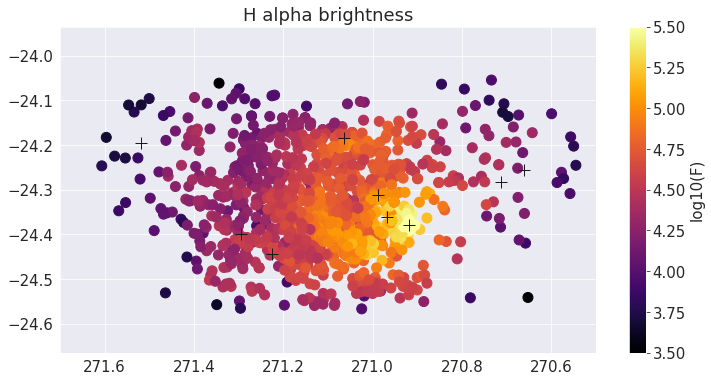

In [57]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 6))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=np.log10(df.NormHalpha), cmap='inferno', vmin=3.5, vmax=5.5)
    fig.colorbar(scat, ax=ax).set_label("log10(F)")
    mark_points(ax)
    ax.set_title('H alpha brightness')
    ax.axis('equal')
    ax.axis([270.5, 271.7, -24.6, -24])
    ax.invert_xaxis()

In [38]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 23.694718837738037 seconds ---
